#Logistic Regression for Classification

Logistic Regression 은 연속하는 값을 예측하는 선형회귀와 달리 원-핫 인코딩을 이용해서 분류값을 예측하는 모델이다

Logistic Regression 은 3가지만 기억하면된다

1. Linear Regression 에 Sigmoid씌우기
2. Cost (예측, 실제 값 차이) 측정
3. Cost값을 최소화 하기 위해 Gradient Decent(기울기 하강)적용


## <Linear Regression에 Sigmoid 씌우기

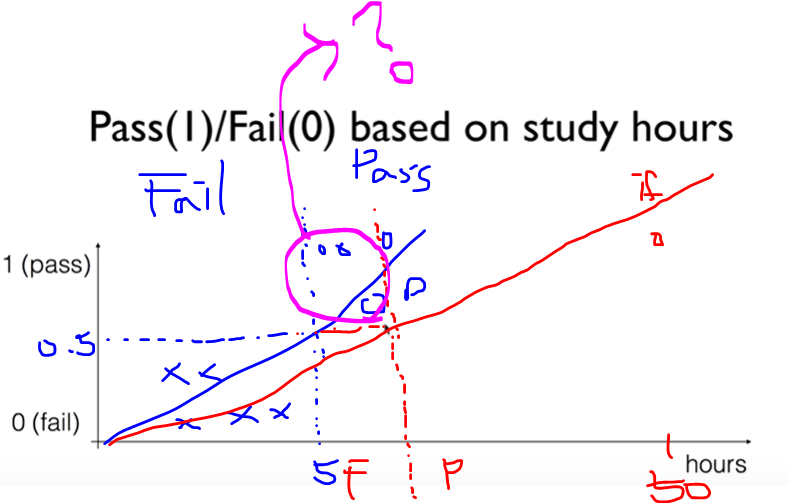

위 그림은 공부시간에 따른 시험의 합격/불합격에 대한 그래프이다. x축은 공부시간, y축은 시험 통과 여부이다. 우선 파란색으로 그려진 x와 o표시로 된 데이터에 기반해서 파란색 Linear Regression이 그려진다

즉, 5시간 이상을 공부하게 되면 y값이 0.5이상으로 통과에 가까워진단는 것이다. 하지만 그림 오른쪽의 if를 보면 갑자기 50시간을 공부한 사람이 튀어나오개 된다.
이것을 바로 이상치라고 한다.

50시간을 공부함으로써 당연히 시험 통과를 한다.(선형 회귀는 연속적인 값을 반환하기 때문에 만약 여기서 50시간의 x값을 준다면 100과 같이 엄청 큰수의 y값을 반환할 것이다.) 하지만 50시간을 공부하여 시험통과를 하게 된 데이터에 의해서 선형회귀 그래프가 빨간색으로 약간 기울어진다

그렇다면 y값이 0.5이상(통과가 되기위해)이 되는 기준의 x값(공부 시간 기준 값이)이 늘어난다. 하지만 여기서 문제가 발생한다. 기울어진 빨간색의 직선으로 인해서 기존에 통과했던 데이터(보라색 동그라미)들이 Fail로 분류가 된다

이로 인해 우리는x값이 어떤값이 들어가도 y값이 0과 1사이의 값에 존재하도록 해야한다

$$0 < H(𝒙) = W𝒙 + b < 1$$

y 값의 이러한 범위를 만들어주기 위해서 똑똑한 수학자들이 고안해낸 sigmoid함수를 이용하도록 한다

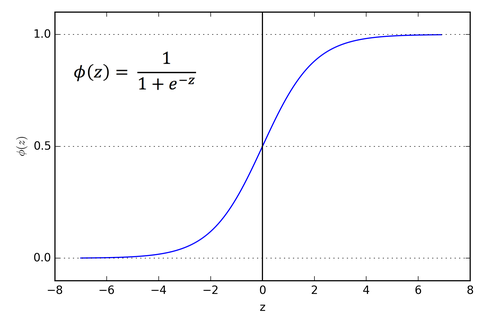

위 그래프를 보면 x값이 음의 무한대로 가면 0 에 수렴을 하고 양의 무한대로 가면 1에 수렴한다. 즉, 어떤 x값이 주어져도 0과 1사이를 벗어나지 못한다

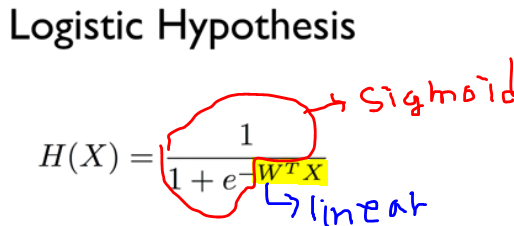

이제 우리는 가설에 Sigmoid함수를 씌웠다. 다음은 바로 Cost함수를 구하는것이다.

## <Cost 값(예측, 실제 값 차이)측정>

cost 값을 구하는 방법은 선형회귀분석과 약간 다르다. 아래 그림을 보자

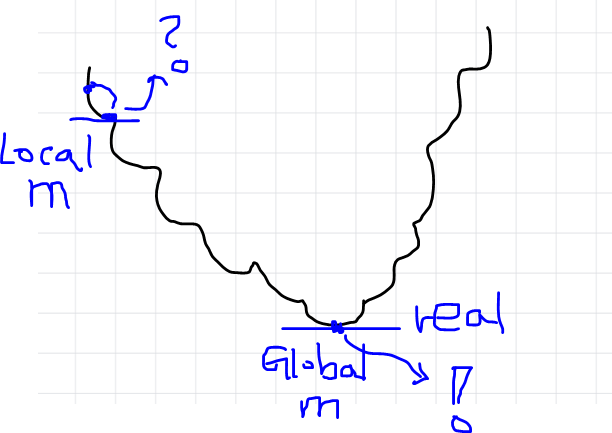

로지스틱 리그레션의 Cost함수를 구해보면 다음과 같다. 선형회귀분석과 달리 구불구불 지점이 부분마다 존재한다.

선형회귀 분석 때도 봤듯이 그래프 위의 어떠한 점에서 출발해서 일정 step만큼 학습을 하다가 평평한 지점을 맞닥뜨리게 되면 최적의 점(Cost가 최소가 되는 점)이라고 판단한다. 하지만 위 그림의 함수를 그대로 이용한다면 진짜로 최적의 지점이 아닌데 부분적으로 평평한 지점에서 최적의 점이라고 잘못 판단을 하게 된다. 전문적인 용어로 저 지점을 Local Minimum이라고 한다.(참고로 실제 최적의 점은 Global Minimum이라고 함)

따라서 우리는 이러한 오류를 방지하기 위해서 Log를 씌워주도록 한다. 여기서 알아야 할점은 y값에 따라 Cost 함수가 조금씩 달라진다

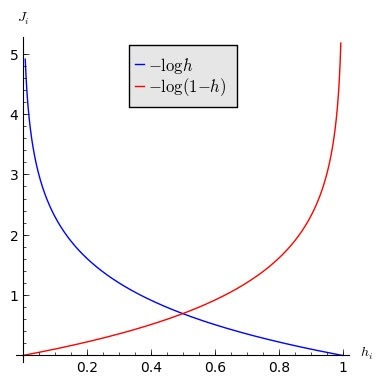

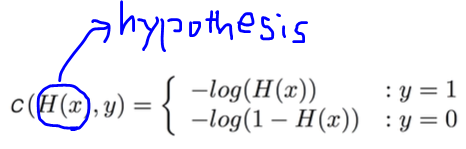

위 두개의 그림처럼 Y값에 따라 Cost함수가 달라진다. 그래프를 이해하기 위해 하나의 예시를 들어보자

y = 1 일때 예측값을 0으로 잘못 예측했다고 해보자.
그렇다면 그래프 속 x축이 1으로 갈수록 y값(Cost값)이 0으로 수렴하는 것을 볼 수 있다. 0으로 수렴한다는 것은 Cost가 최소이고 최솟값은 예측을 정확하게 잘했다는 것이다.

반대로 y=1일때 예측값을 0으로 잘못 예측했다고 해보자. 그렇다면 그래프 속 x축이 0으로 갈수록 y값(Cost값)이 무한대로 발산하는것을 볼수 있다. 무한대로 발산한다는 것은 Cost가 최대값으로 치솟고 그것은 예측을 하지 못했다는 것이다

$$C(H(x),y) = ylog(H(x)) - (1-y)log(1-H(x))$$

##<Cost 값을 최소화 하기 위해 Gradient Decent(기울기 하강)적용>

그럼 이제 Cost값을 최소화 학 위해 기울기 하강을 적용할 단계이다

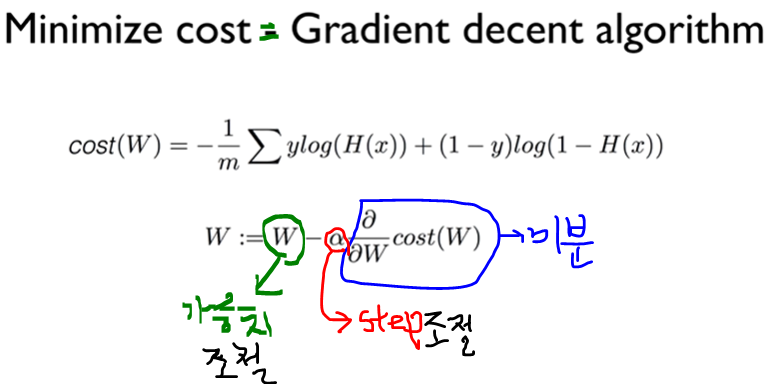

cost(W)값은 우리가 2번에서 구했던 Cost함수에 대한 수식이다. 이를 최소화 하기 위해서는 위와 같은 계산을 해주면 된다. 파란색인 미분은 기계가 알아서 해주기 때문에 신경쓸 필요는 없다. 우리가 조정해줘야 할것은 초록색 동그라미의 가중치 조절과 빨간색 알파값의 Step 조절이다. (여기서 Step 은 선형회귀 분석에 정의해 두었다. 주로 Learning rate라고 부르기도 한다)